In [82]:
# !pip install jupyterthemes
!jt -t grade3
# !jt -t chesterish
import pandas as pd
import numpy as np

import re
import string
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
# import xlrd
import collections
import openpyxl
%matplotlib inline

In [83]:
df1=pd.read_excel("Data.xlsx",sheet_name="Code")
df=pd.read_excel("Data.xlsx",sheet_name="456")
df2=pd.read_excel("Data.xlsx",sheet_name="Inc-LHE")
df3=pd.read_excel("Data.xlsx",sheet_name="Inc-Deq")
df4=pd.read_excel("Data.xlsx",sheet_name="456")
df5=pd.read_excel("Data.xlsx",sheet_name="Inc-Met")
# df1.head()

In [84]:
df=df.dropna()
df = df[df["Pivotal Event 1"] != 0]
df.head(3)

,Month,Date,time,Time,Quarter,Hazardous Element,IE,Pivotal Event 1,Incident,Target,Threat,RCS1,RCS2,RCS3
0,April,2016-04-28,16:10:00,28-04-2016 16:10,Q1,HE1,Eq,Dev,Deq,Human\nProperty,Injury\nProperty damage,IM,IM,IM
1,April,2016-04-27,16:35:00,27-04-2016 16:35,Q1,HE2,H,Oth,Met,Human\nProperty,Injury\nProperty damage,OP,SC,SC
2,April,2016-04-08,05:50:00,08-04-2016 05:50,Q1,HE3,H,Mov,LHE,Human\nProperty,Injury\nProperty damage,SC,SC,SC


In [85]:
from dateutil import parser
df['time_stamp'] = df['Time'].map(parser.parse)
df['event_year'] = df['time_stamp'].map(lambda x: x.year)
df['event_month'] = df['time_stamp'].map(lambda x: x.month)
df['event_weekday'] = df['time_stamp'].map(lambda x: x.dayofweek)

In [86]:
df.IE.describe()

count     443
unique      4
top        Eq
freq      288
Name: IE, dtype: object

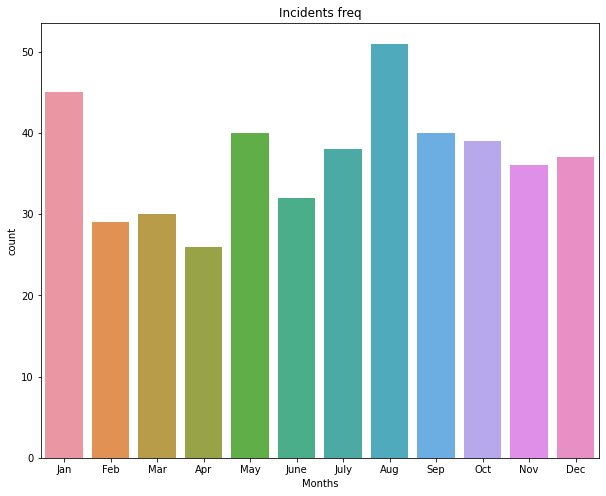

In [87]:
data = """
Mon Tue Wed Thur Fri Sat Sun
"""
x = [0,1,2,3,4,5,6,7,8,9,10,11]
labels = ['Jan', 'Feb', 'Mar', 'Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
  
weeks = data.split()
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["event_month"])
plt.title("Incidents freq")
plt.xlabel("Months")
plt.xticks(x,labels)
plt.show()

In [88]:
df.head(2)

,Month,Date,time,Time,Quarter,Hazardous Element,IE,Pivotal Event 1,Incident,Target,Threat,RCS1,RCS2,RCS3,time_stamp,event_year,event_month,event_weekday
0,April,2016-04-28,16:10:00,28-04-2016 16:10,Q1,HE1,Eq,Dev,Deq,Human\nProperty,Injury\nProperty damage,IM,IM,IM,2016-04-28 16:10:00,2016,4,3
1,April,2016-04-27,16:35:00,27-04-2016 16:35,Q1,HE2,H,Oth,Met,Human\nProperty,Injury\nProperty damage,OP,SC,SC,2016-04-27 16:35:00,2016,4,2


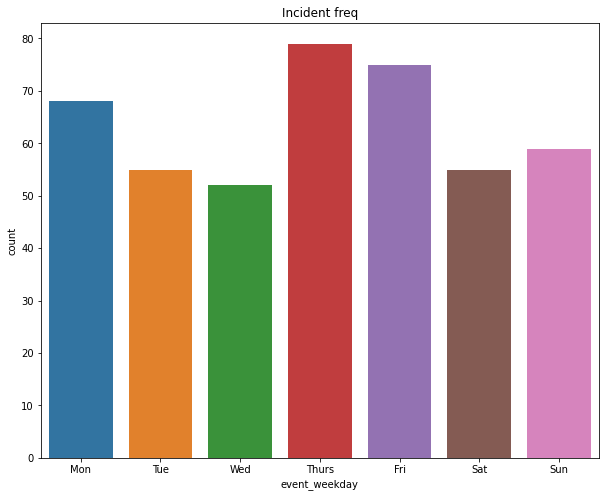

In [89]:
data = """
Mon Tue Wed Thur Fri Sat Sun
"""
x = [0,1,2,3,4,5,6]
labels = ['Mon', 'Tue', 'Wed', 'Thurs','Fri','Sat','Sun']
  
weeks = data.split()
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["event_weekday"])
plt.title("Incident freq")
plt.xticks(x,labels)
plt.show()

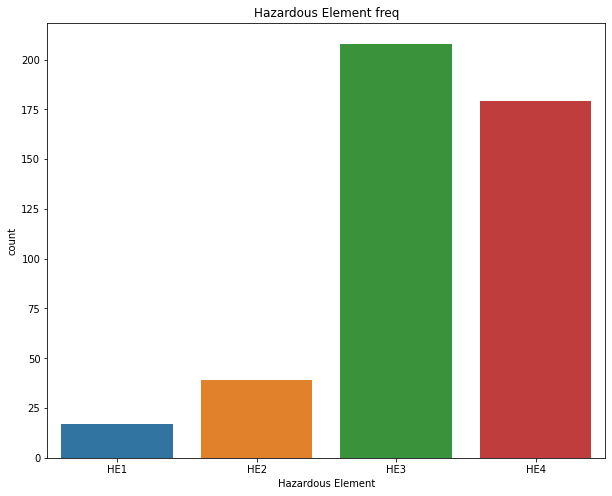

In [90]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["Hazardous Element"])
plt.title("Hazardous Element freq")
plt.show()

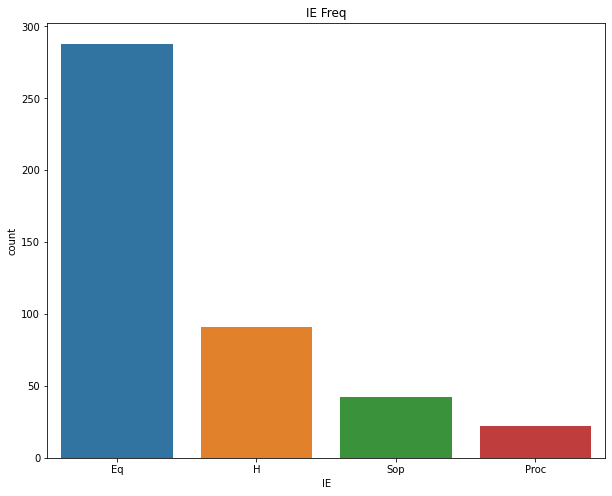

In [91]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["IE"])
plt.title("IE Freq")
plt.show()

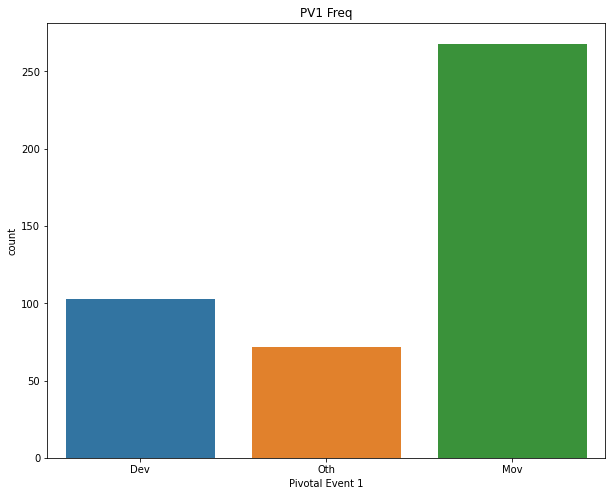

In [92]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["Pivotal Event 1"])
plt.title("PV1 Freq")
plt.show()

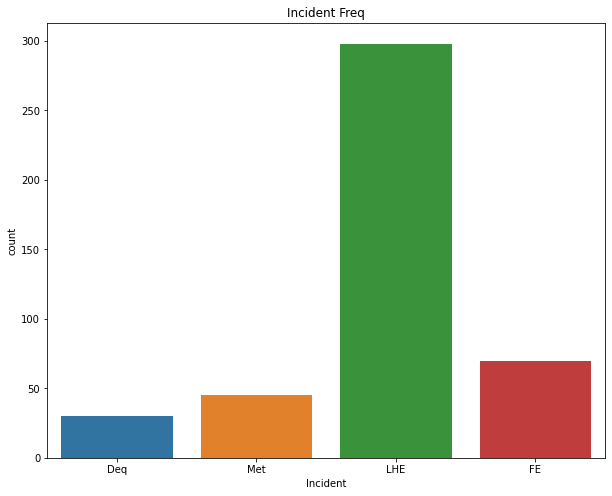

In [93]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["Incident"])
plt.title("Incident Freq")
plt.show()


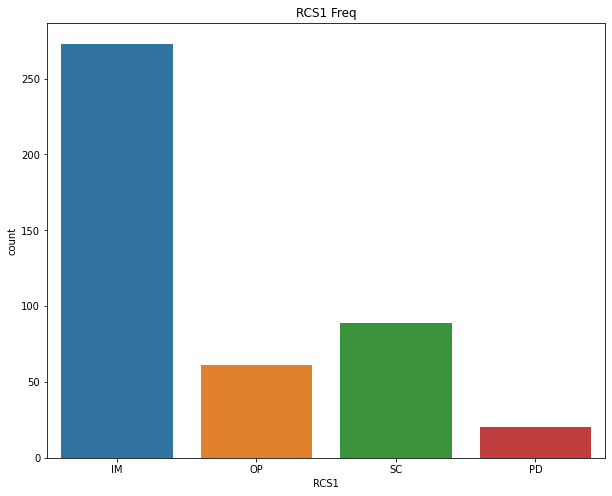

In [94]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["RCS1"])
plt.title("RCS1 Freq")
plt.show()


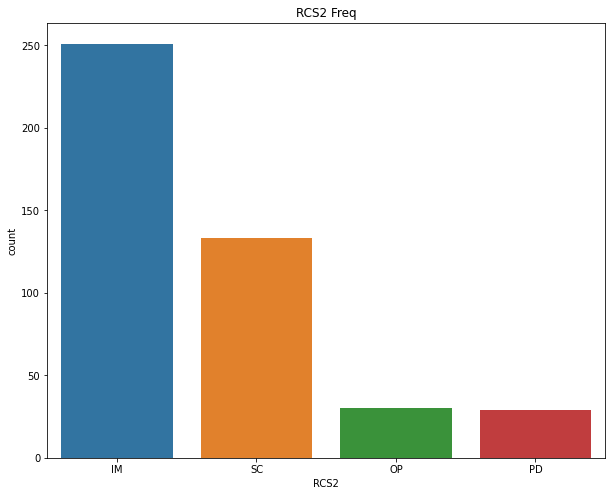

In [95]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["RCS2"])
plt.title("RCS2 Freq")
plt.show()


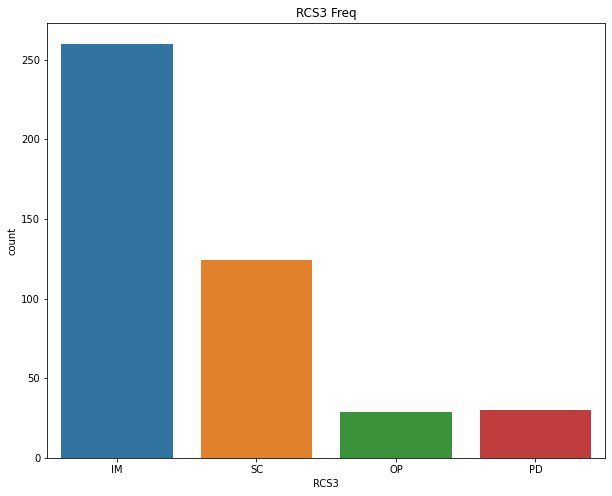

In [96]:
ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot(x=df["RCS3"])
plt.title("RCS3 Freq")
plt.show()


In [97]:
df.head(3)

,Month,Date,time,Time,Quarter,Hazardous Element,IE,Pivotal Event 1,Incident,Target,Threat,RCS1,RCS2,RCS3,time_stamp,event_year,event_month,event_weekday
0,April,2016-04-28,16:10:00,28-04-2016 16:10,Q1,HE1,Eq,Dev,Deq,Human\nProperty,Injury\nProperty damage,IM,IM,IM,2016-04-28 16:10:00,2016,4,3
1,April,2016-04-27,16:35:00,27-04-2016 16:35,Q1,HE2,H,Oth,Met,Human\nProperty,Injury\nProperty damage,OP,SC,SC,2016-04-27 16:35:00,2016,4,2
2,April,2016-04-08,05:50:00,08-04-2016 05:50,Q1,HE3,H,Mov,LHE,Human\nProperty,Injury\nProperty damage,SC,SC,SC,2016-08-04 05:50:00,2016,8,3


In [121]:
df2=pd.DataFrame()
df2=df[['Hazardous Element','RCS1']]
# df2=df[['Hazardous Element','IE','Pivotal Event 1','RCS1','RCS3','RCS3']]
df2

,Hazardous Element,RCS1
0,HE1,IM
1,HE2,OP
2,HE3,SC
3,HE3,IM
4,HE4,OP
5,HE3,IM
6,HE4,IM
7,HE4,SC
8,HE4,IM
9,HE4,SC


In [122]:
data=list(df2.values)

In [123]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(df2.values).transform(df2.values)
df3=pd.DataFrame(te_ary,columns=te.columns_)
df3

,HE1,HE2,HE3,HE4,IM,OP,PD,SC
0,True,False,False,False,True,False,False,False
1,False,True,False,False,False,True,False,False
2,False,False,True,False,False,False,False,True
3,False,False,True,False,True,False,False,False
4,False,False,False,True,False,True,False,False
5,False,False,True,False,True,False,False,False
6,False,False,False,True,True,False,False,False
7,False,False,False,True,False,False,False,True
8,False,False,False,True,True,False,False,False
9,False,False,False,True,False,False,False,True


In [124]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df3,min_support=0.01,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.038375,(HE1)
1,0.088036,(HE2)
2,0.469526,(HE3)
3,0.404063,(HE4)
4,0.616253,(IM)
5,0.137698,(OP)
6,0.045147,(PD)
7,0.200903,(SC)
8,0.027088,"(HE1, IM)"
9,0.011287,"(HE1, SC)"


In [132]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.50)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HE1),(IM),0.038375,0.616253,0.027088,0.705882,1.145443,0.003440,1.304740
1,(HE2),(SC),0.088036,0.200903,0.049661,0.564103,2.807836,0.031975,1.833223
2,(HE3),(IM),0.469526,0.616253,0.255079,0.543269,0.881569,-0.034268,0.840204
3,(OP),(HE3),0.137698,0.469526,0.076749,0.557377,1.187106,0.012097,1.198478
4,(PD),(HE3),0.045147,0.469526,0.038375,0.850000,1.810337,0.017177,3.536494
5,(HE4),(IM),0.404063,0.616253,0.313770,0.776536,1.260094,0.064765,1.717269
6,(IM),(HE4),0.616253,0.404063,0.313770,0.509158,1.260094,0.064765,1.214110


In [133]:
res2=res[['antecedents','consequents','support','confidence','lift']]

res2.to_excel("x.xlsx")
res2

,antecedents,consequents,support,confidence,lift
0,(HE1),(IM),0.027088,0.705882,1.145443
1,(HE2),(SC),0.049661,0.564103,2.807836
2,(HE3),(IM),0.255079,0.543269,0.881569
3,(OP),(HE3),0.076749,0.557377,1.187106
4,(PD),(HE3),0.038375,0.850000,1.810337
5,(HE4),(IM),0.313770,0.776536,1.260094
6,(IM),(HE4),0.313770,0.509158,1.260094


In [130]:
# res2=res1[res1['confidence']>=1]
# res2

In [131]:
res2=res2[res2['lift']>=1]
res2

,antecedents,consequents,support,confidence,lift
0,(HE1),(IM),0.027088,0.705882,1.145443
1,(HE2),(SC),0.049661,0.564103,2.807836
3,(OP),(HE3),0.076749,0.557377,1.187106
4,(PD),(HE3),0.038375,0.850000,1.810337
5,(HE4),(IM),0.313770,0.776536,1.260094
6,(IM),(HE4),0.313770,0.509158,1.260094


In [106]:
# res2=res2.drop[res2.index%2==1]
# res2.drop(res2[res2.index%2 == '0'].index)

In [107]:
res2
res2.to_excel("rcs1.xlsx")

In [108]:
df2=pd.DataFrame()
df2=df[['Hazardous Element','IE','RCS2']]
# df2=df[['Hazardous Element','IE','Pivotal Event 1','RCS1','RCS3','RCS3']]
df2

,Hazardous Element,IE,RCS2
0,HE1,Eq,IM
1,HE2,H,SC
2,HE3,H,SC
3,HE3,Eq,IM
4,HE4,Sop,OP
5,HE3,Eq,IM
6,HE4,Eq,SC
7,HE4,H,SC
8,HE4,Eq,IM
9,HE4,H,SC


In [109]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(df2.values).transform(df2.values)
df3=pd.DataFrame(te_ary,columns=te.columns_)
# df3
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df3,min_support=0.01,use_colnames=True)
# frequent_itemsets=apriori(df3,use_colnames=True)
pd.options.display.max_rows = None

frequent_itemsets



,support,itemsets
0,0.650113,(Eq)
1,0.205418,(H)
2,0.038375,(HE1)
3,0.088036,(HE2)
4,0.469526,(HE3)
5,0.404063,(HE4)
6,0.566591,(IM)
7,0.067720,(OP)
8,0.065463,(PD)
9,0.049661,(Proc)


In [110]:
from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.75)
res2=res[['antecedents','consequents','support','confidence','lift']]
res2

,antecedents,consequents,support,confidence,lift
0,(HE4),(Eq),0.329571,0.815642,1.254617
1,(IM),(Eq),0.553047,0.976096,1.501425
2,(Eq),(IM),0.553047,0.850694,1.501425
3,(H),(SC),0.191874,0.934066,3.111212
4,(Proc),(HE3),0.042889,0.863636,1.839379
5,(Sop),(SC),0.072235,0.761905,2.537773
6,"(HE1, IM)",(Eq),0.027088,1.000000,1.538194
7,"(HE1, Eq)",(IM),0.027088,1.000000,1.764940
8,"(HE2, IM)",(Eq),0.018059,0.888889,1.367284
9,"(HE2, Eq)",(IM),0.018059,0.888889,1.568836


In [111]:

res2=res2[res2['lift']>=1]
res2

,antecedents,consequents,support,confidence,lift
0,(HE4),(Eq),0.329571,0.815642,1.254617
1,(IM),(Eq),0.553047,0.976096,1.501425
2,(Eq),(IM),0.553047,0.850694,1.501425
3,(H),(SC),0.191874,0.934066,3.111212
4,(Proc),(HE3),0.042889,0.863636,1.839379
5,(Sop),(SC),0.072235,0.761905,2.537773
6,"(HE1, IM)",(Eq),0.027088,1.000000,1.538194
7,"(HE1, Eq)",(IM),0.027088,1.000000,1.764940
8,"(HE2, IM)",(Eq),0.018059,0.888889,1.367284
9,"(HE2, Eq)",(IM),0.018059,0.888889,1.568836


In [112]:
type(res2.antecedents[1])
# for i in 
res2 = res2[res2['antecedents'].apply(len) == 2]
res2 = res2[res2['consequents'].apply(len) == 1]
# res2 = res2[res2['antecedents'].apply(len) >= 2]
res2

,antecedents,consequents,support,confidence,lift
6,"(HE1, IM)",(Eq),0.027088,1.000000,1.538194
7,"(HE1, Eq)",(IM),0.027088,1.000000,1.764940
8,"(HE2, IM)",(Eq),0.018059,0.888889,1.367284
9,"(HE2, Eq)",(IM),0.018059,0.888889,1.568836
10,"(HE3, IM)",(Eq),0.221219,0.989899,1.522657
11,"(HE3, Eq)",(IM),0.221219,0.809917,1.429456
12,"(HE4, IM)",(Eq),0.286682,0.969466,1.491227
13,"(HE4, Eq)",(IM),0.286682,0.869863,1.535256
14,"(PD, HE4)",(Eq),0.022573,0.769231,1.183226
15,"(HE1, H)",(SC),0.011287,1.000000,3.330827


In [113]:

a1=frozenset({'IM'})
a2=frozenset({'Co'})
a3=frozenset({'OP'})
a4=frozenset({'SC'})
a5=frozenset({'PTW'})
res3= res2[ (res2['consequents'] == a1)|(res2['consequents'] == a2)|(res2['consequents'] == a3)|(res2['consequents'] == a4)|(res2['consequents'] == a5)]
res3.to_excel("rcs2.xlsx")
res3
# OP
# PD
# SC
# PTW

,antecedents,consequents,support,confidence,lift
7,"(HE1, Eq)",(IM),0.027088,1.000000,1.764940
9,"(HE2, Eq)",(IM),0.018059,0.888889,1.568836
11,"(HE3, Eq)",(IM),0.221219,0.809917,1.429456
13,"(HE4, Eq)",(IM),0.286682,0.869863,1.535256
15,"(HE1, H)",(SC),0.011287,1.000000,3.330827
17,"(HE2, H)",(SC),0.051919,0.920000,3.064361
19,"(HE3, H)",(SC),0.092551,0.976190,3.251522
20,"(H, HE4)",(SC),0.036117,0.842105,2.804907
23,"(HE3, Sop)",(SC),0.047404,0.807692,2.690283


In [134]:
df2=pd.DataFrame()
df2=df[['Hazardous Element','IE','Pivotal Event 1','RCS3']]
# df2=df[['Hazardous Element','IE','Pivotal Event 1','RCS1','RCS3','RCS3']]
# df2
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(df2.values).transform(df2.values)
df3=pd.DataFrame(te_ary,columns=te.columns_)
# df3



from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df3,min_support=0.01,use_colnames=True)
# frequent_itemsets=apriori(df3,use_colnames=True)
frequent_itemsets





,support,itemsets
0,0.232506,(Dev)
1,0.650113,(Eq)
2,0.205418,(H)
3,0.038375,(HE1)
4,0.088036,(HE2)
5,0.469526,(HE3)
6,0.404063,(HE4)
7,0.586907,(IM)
8,0.604966,(Mov)
9,0.065463,(OP)


In [135]:

from mlxtend.frequent_patterns import association_rules
res = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.75)
# res
res2=res[['antecedents','consequents','support','confidence','lift']]
# res2
res2=res2[res2['lift']>=1]
res2



# type(res2.antecedents[1])
# for i in 


,antecedents,consequents,support,confidence,lift
0,(HE1),(Dev),0.029345,0.764706,3.288978
1,(HE4),(Eq),0.329571,0.815642,1.254617
2,(IM),(Eq),0.573363,0.976923,1.502698
3,(Eq),(IM),0.573363,0.881944,1.502698
4,(H),(SC),0.191874,0.934066,3.337026
5,(Proc),(HE3),0.042889,0.863636,1.839379
6,"(HE1, Dev)",(Eq),0.022573,0.769231,1.183226
7,"(HE1, Eq)",(Dev),0.022573,0.833333,3.584142
8,"(Dev, HE4)",(Eq),0.072235,0.842105,1.295322
9,"(Dev, IM)",(Eq),0.146727,0.970149,1.492278


In [136]:
res2 = res2[res2['antecedents'].apply(len) == 3]
res2 = res2[res2['consequents'].apply(len) == 1]
# res2 = res2[res2['antecedents'].apply(len) >= 2]
res2







,antecedents,consequents,support,confidence,lift
47,"(HE1, Dev, IM)",(Eq),0.022573,1.000000,1.538194
48,"(HE1, Dev, Eq)",(IM),0.022573,1.000000,1.703846
49,"(HE1, Eq, IM)",(Dev),0.022573,0.833333,3.584142
53,"(Dev, HE3, IM)",(Eq),0.056433,1.000000,1.538194
54,"(Dev, HE3, Eq)",(IM),0.056433,0.961538,1.638314
55,"(Dev, HE4, IM)",(Eq),0.060948,0.964286,1.483259
56,"(Dev, HE4, Eq)",(IM),0.060948,0.843750,1.437620
57,"(HE2, Dev, H)",(SC),0.020316,0.818182,2.923021
58,"(HE2, Dev, SC)",(H),0.020316,0.818182,3.983017
59,"(Dev, HE3, H)",(SC),0.015801,1.000000,3.572581


In [137]:
a1=frozenset({'IM'})
a2=frozenset({'Co'})
a3=frozenset({'OP'})
a4=frozenset({'SC'})
a5=frozenset({'PTW'})
res3= res2[ (res2['consequents'] == a1)|(res2['consequents'] == a2)|(res2['consequents'] == a3)|(res2['consequents'] == a4)|(res2['consequents'] == a5)]
res3.to_excel("rcs3.xlsx")
res3

,antecedents,consequents,support,confidence,lift
48,"(HE1, Dev, Eq)",(IM),0.022573,1.000000,1.703846
54,"(Dev, HE3, Eq)",(IM),0.056433,0.961538,1.638314
56,"(Dev, HE4, Eq)",(IM),0.060948,0.843750,1.437620
57,"(HE2, Dev, H)",(SC),0.020316,0.818182,2.923021
59,"(Dev, HE3, H)",(SC),0.015801,1.000000,3.572581
62,"(HE2, Oth, Eq)",(IM),0.011287,0.833333,1.419872
64,"(Mov, HE3, Eq)",(IM),0.148984,0.814815,1.388319
66,"(Oth, HE3, Eq)",(IM),0.029345,0.928571,1.582143
69,"(Mov, HE4, Eq)",(IM),0.207675,0.901961,1.536802
72,"(Oth, HE4, Eq)",(IM),0.024831,0.916667,1.561859
